<a href="https://colab.research.google.com/github/alex-pakalniskis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 2*

---

# Make Features 

- Student should be able to understand the purpose of feature engineering
- Student should be able to work with strings in pandas
- Student should be able to work with dates and times in pandas
- Student should be able to modify or create columns of a dataframe using the `.apply()` function


Helpful Links:
- [Minimally Sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

# [Objective](#feature-engineering) - The Purpose of Feature Engineering



## Overview

Feature Engineering is the process of using a combination of domain knowledge, creativity and the pre-existing columns of a dataset to create completely new columns.

 Machine Learning models try to detect patterns in the data and then associate those patterns with certain predictions. The hope is that by creating new columns on our dataset that we can expose our model to new patterns in the data so that it can make better and better predictions.

This is largely a matter of understanding how to work with individual columns of a dataframe with Pandas --which is what we'll be practicing today!

## Follow Along

Columns of a dataframe hold each hold a specific type of data. Lets inspect some of the common datatypes found in datasets and then we'll make a new feature on a dataset using pre-existing columns.

In [0]:
import pandas as pd

In [0]:
# Lets take a look at the Ames Iowa Housing Dataset:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

### Specific Columns hold specific kinds of data

In [10]:
pd.set_option("display.max_rows", len(df.columns))

df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Some columns hold integer values like the `BedroomAbvGr` which stands for "Bedrooms Above Grade." This is the number of non-basement bedrooms in the home.

For more information on specific column meanings view the [data dictionary](https://github.com/ryanleeallred/datasets/blob/master/Ames%20Housing%20Data/data_description.txt).

In [11]:
# Look at the first ten rows of the `BedroomAbvGr` column.
# Looks like integers to me!
df["BedroomAbvGr"]

0       3
1       3
2       3
3       3
4       4
       ..
1455    3
1456    3
1457    4
1458    2
1459    3
Name: BedroomAbvGr, Length: 1460, dtype: int64

Some columns hold float values like the `LotFrontage` column.

In [14]:
# Look at the first ten rows of the `LotFrontage` column.
df["LotFrontage"].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

Hmmm, do the values above look like floats to you?

They all have .0 on them so technically they're being stored as floats, but *should* they be stored as floats?

Lets see what all of the possible values for this column are.

In [21]:
pd.set_option("display.max_rows", 120)


df["LotFrontage"].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
40.0      12
76.0      11
69.0      11
53.0      10
92.0      10
88.0      10
34.0      10
86.0      10
77.0       9
35.0       9
44.0       9
84.0       9
62.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
95.0       7
120.0      7
58.0       7
41.0       6
105.0      6
54.0       6
94.0       6
48.0       6
110.0      6
30.0       6
89.0       6
81.0       6
91.0       6
36.0       6
47.0       5
83.0       5
37.0       5
87.0       5
32.0       5
56.0       5
102.0      4
42.0       4
49.0       4
99.0       3
45.0       3
104.0      3
130.0      3
103.0      3
108.0      3

Looks to me like the `LotFrontage` column originally held integer values but was cast to a `float` meaning that each original integer values was converted to its corresponding float representation. 

Any guesses as to why that would have happened?


HINT: What's the most common `LotFrontage` value for this column?

In [26]:
# NaN is the most common value in this column. What is a NaN
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

`NaN` stands stands for "Not a Number" and is the default missing value indicator with Pandas. This means there were cells in this column that didn't have a LotFrontage value recorded for those homes. 

This is where domain knowledge starts to come in. Think about the context we're working with here: houses. What might a null or blank cell representing "Linear feet of street connected to property" mean in the context of a housing dataset?

Ok, so maybe it makes seanse to have some NaNs in this column. What is the datatype of a NaN value?

Perhaps some of this data is truly missing or unrecorded data, but sometimes `NaNs` are more likely to indicate something that was "NA" or "Not Applicable" to a particular observation. There could be multiple reasons why there was no value recorded for a particular feature.

Remember, that Pandas tries to maintain a single datatype for all values in a column, and therefore...

In [22]:
import numpy as np

# What is the datatype of NaN?

type(np.NaN)

float

The datatype of a NaN is float!  This means that if we have a column of integer values, but the column has even a single `NaN` that column will not be treated with the integer datatype but all of the integers will be converted to floats in order to try and preserve the same datatype throughout the entire column.

You can see already how understanding column datatypes is crucial to understanding how Pandas help us manage our data.

### Making new Features

Lets slim down the dataset and consider just a few specific columns:

- `TotalBsmtSF`
- `1stFlrSF`
- `2ndFlrSF`
- `SalePrice1`


In [27]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets

df_small = df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()

df_small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,856,856,854,208500
1,1262,1262,0,181500
2,920,920,866,223500
3,756,961,756,140000
4,1145,1145,1053,250000


### Syntax for creating new columns

When making a new column on a dataframe, we have to use the square bracket syntax of accessing a column. We can't use "dot syntax" here.

In [28]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset

# Using bracket syntax to make a new 'TotalSquareFootage' column

df_small["TotalSquareFootage"] = df_small["TotalBsmtSF"] + df_small["1stFlrSF"] + df_small["2ndFlrSF"]

df_small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [29]:
# Lets make a nother new column that is 'PricePerSqFt' by
# dividing the price by the square footage

df_small["PricePerSqFt"] = df_small["SalePrice"] / df_small["TotalSquareFootage"]

df_small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


Ok, we have made two new columns on our small dataset.

- What does a **high** `PricePerSqFt` say about a home that the square footage and price alone don't capture as directly?

- What does a **low** `PricePerSqFt` say about a home that the square footage and price alone don't directly capture?



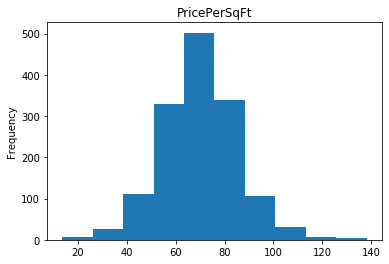

In [37]:
df_small["PricePerSqFt"].plot.hist(title="PricePerSqFt");

## Challenge

I hope you can see how we have used existing columns to create a new column on a dataset that say something new about our unit of observation. This is what making new features (columns) on a dataset is all about and why it's so essential to data science --particularly predictive modeling "Machine Learning." 

We'll spend the rest of the lecture and assignment today trying to get as good as we can at manipulating (cleaning) and creating new columns on datasets.

# [Objective](#work-with-strings) Work with Strings with Pandas

## Overview

So far we have worked with numeric datatypes (ints and floats) but we haven't worked with any columns containing string values. We can't simply use arithmetic to manipulate string values, so we'll need to learn some more techniques in order to work with this datatype.

## Follow Along

We're going to import a new dataset here to work with. This dataset is from LendingClub and holds information about loans issued in Q4 of 2018. This dataset is a bit messy so it will give us plenty of opportunities to clean up existing columns as well as create new ones.

The `!wget` shell command being used here does exactly the same thing that your browser does when you type a URL in the address. It makes a request or "gets" the file at that address. However, in our case the file isn't a webpage, it's a compressed CSV file. 

Try copying and pasting the URL from below into your browser, did it start an automatic download? Any URLs like this that start automatic downloads when navigated to can be used along with the `!wget` command to bring files directly into your notebook's memory.

### Load a new dataset

We need to use the `!unzip` command to extract the csv from the zipped folder.

In [47]:
import pandas as pd

df = pd.read_csv("/content/LoanStats_2017Q1_2.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
df

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id                                               member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title                  emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title              zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_il_6m open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_il_6m sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med                sec_app_mths_since_last_major_derog                              
NaN                                              NaN       3600      3600        3600             36 months   7.49%  111.97      A     A4        Code/Compliance Inspector  10+ years  MORTGAGE       120000     Not Verified        Mar-2017 Issued      n          NaN NaN  other              Other              467xx    IN         18.9  0           Aug-1992         1              NaN                    96                     18       1       5658      14.9%      33        w                   3600.00   3600.00       0.0         0.00            0.00            0.00          0.0                0.0        0.0                     NaN          0.0             Apr-2017     Apr-2017           0                          NaN                         1           INDIVIDUAL       NaN              NaN       NaN                       0              0            36506       2           6          2           6           2                  30848        55      4           7           1020       39       37900            3      1           4            13                   2147        7980           11.3    0                        0           166                295                  3                     2              0        9                    NaN                      2                     NaN                            0                     1              4               2           3         17        12            16            4                   18       0                0            0                  6                  100            0                1                    0         93599           36506             9000           55699                      NaN             NaN                      NaN                    NaN              NaN              NaN                NaN                NaN                   NaN                              NaN                                                                        

We can also use bash/shell commands to look at the raw file using the `!head` and `!tail` commands

In [52]:
!head /content/LoanStats_2017Q1_2.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","ope

In [53]:
!tail /content/LoanStats_2017Q1_2.csv

"","","10400","10400","10400"," 36 months"," 14.99%","360.47","C","C4","Glaze Operator","5 years","RENT","26000","Source Verified","Jan-2017","Current","n","","","debt_consolidation","Debt consolidation","657xx","MO","18.56","0","Mar-2006","0","","","3","0","3901","70.9%","7","f","9699.65","9699.65","1072.75","1072.75","700.35","372.40","0.0","0.0","0.0","Apr-2017","360.47","May-2017","Apr-2017","0","","1","INDIVIDUAL","","","","0","0","9173","0","1","0","1","18","5272","58","0","0","3887","63","5500","0","0","0","1","3058","1599","70.9","0","0","103","129","74","18","0","74","","","","0","2","2","2","2","5","2","2","2","3","0","0","0","0","100","50","0","0","14600","9173","5500","9100","","","","","","","","","","",""
"","","30000","30000","30000"," 60 months"," 21.49%","819.9","D","D5","Teacher Department Head","10+ years","MORTGAGE","60000","Verified","Jan-2017","Current","n","","","debt_consolidation","Debt consolidation","615xx","IL","43","1","Nov-1999","3","11","","21","0","29102

As we look at the raw file itself, do you see anything that might cause us trouble as we read in the CSV file to a dataframe?

In [0]:
# Read in the CSV

The extra rows at the top and bottom of the file have done two things:

1) The top row has made it so that the entire dataset is being interpreted as column headers

2) The bottom two rows have been read into the 'id' column and are causing every column to have at least two `NaN` values in it.

In [51]:
# We can fix the header problem by using the 'skiprows' parameter
df = pd.read_csv("/content/LoanStats_2017Q1_2.csv", skiprows=1)


df.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,112) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,NaN,NaN,3600.0,3600.0,3600.0,36 months,7.49%,111.97,A,A4,Code/Compliance Inspector,10+ years,MORTGAGE,120000.0,Not Verified,Mar-2017,Issued,n,NaN,NaN,other,Other,467xx,IN,18.90,0.0,Aug-1992,1.0,NaN,96.0,18.0,1.0,5658.0,14.9%,33.0,w,3600.00,3600.00,0.00,0.00,...,3.0,2.0,0.0,9.0,NaN,2.0,NaN,0.0,1.0,4.0,2.0,3.0,17.0,12.0,16.0,4.0,18.0,0.0,0.0,0.0,6.0,100.0,0.0,1.0,0.0,93599.0,36506.0,9000.0,55699.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,15000.0,15000.0,15000.0,60 months,14.99%,356.78,C,C4,Senior Superintendent,10+ years,MORTGAGE,125000.0,Not Verified,Mar-2017,Issued,n,NaN,NaN,other,Other,064xx,CT,17.25,0.0,Sep-1989,0.0,NaN,NaN,11.0,0.0,53167.0,75.3%,18.0,w,15000.00,15000.00,0.00,0.00,...,16.0,16.0,2.0,16.0,NaN,16.0,NaN,0.0,5.0,7.0,6.0,8.0,6.0,8.0,10.0,7.0,11.0,0.0,0.0,0.0,0.0,100.0,66.7,0.0,0.0,148572.0,69364.0,60300.0,30224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,8400.0,8400.0,8400.0,36 months,11.39%,276.56,B,B3,IT Tech,8 years,MORTGAGE,50000.0,Source Verified,Mar-2017,Issued,n,NaN,NaN,other,Other,454xx,OH,15.63,0.0,Apr-2005,0.0,NaN,NaN,14.0,0.0,12831.0,30.3%,30.0,w,8400.00,8400.00,0.00,0.00,...,4.0,4.0,4.0,4.0,NaN,10.0,NaN,0.0,4.0,5.0,7.0,11.0,9.0,11.0,16.0,5.0,14.0,0.0,0.0,0.0,5.0,100.0,14.3,0.0,0.0,205671.0,51591.0,36100.0,36876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000.0,4000.0,4000.0,36 months,10.49%,130.00,B,B2,Dental hygienist,2 years,RENT,50000.0,Source Verified,Mar-2017,Issued,n,NaN,NaN,major_purchase,Major purchase,768xx,TX,33.61,1.0,Apr-2003,0.0,6.0,37.0,10.0,1.0,4388.0,33.2%,33.0,w,4000.00,4000.00,0.00,0.00,...,15.0,7.0,6.0,120.0,NaN,9.0,61.0,1.0,1.0,4.0,1.0,3.0,15.0,6.0,12.0,4.0,10.0,0.0,0.0,0.0,1.0,87.5,100.0,0.0,0.0,152852.0,136208.0,2500.0,139652.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,6000.0,6000.0,6000.0,36 months,7.24%,185.93,A,A3,Program Manager,3 years,RENT,125000.0,Source Verified,Mar-2017,Current,n,NaN,NaN,credit_card,Credit card refinancing,981xx,WA,9.25,0.0,Jul-2004,1.0,54.0,NaN,16.0,0.0,9571.0,41.3%,27.0,w,5850.27,5850.27,164.21,164.21,...,7.0,3.0,0.0,7.0,NaN,4.0,NaN,9.0,3.0,3.0,5.0,5.0,22.0,5.0,5.0,3.0,16.0,0.0,0.0,0.0,3.0,59.1,20.0,0.0,0.0,72865.0,60622.0,23200.0,49665.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets look at the NaN values of each column so that you can see the problem that the extra rows at the bottom of the file are creating for us

In [56]:
# Sum null values by column and sort from least to greatest

df.isnull().sum().sort_values()

open_il_6m                                 2
delinq_amnt                                2
chargeoff_within_12_mths                   2
avg_cur_bal                                2
acc_open_past_24mths                       2
                                       ...  
sec_app_mths_since_last_major_derog    96425
id                                     96779
url                                    96781
member_id                              96781
desc                                   96781
Length: 122, dtype: int64

In [0]:
# Address the extra NaNs in each column by skipping the footer as well.

In [57]:
df = pd.read_csv("/content/LoanStats_2017Q1_2.csv", skiprows=1, skipfooter=2)

df.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,NaN,NaN,3600,3600,3600,36 months,7.49%,111.97,A,A4,Code/Compliance Inspector,10+ years,MORTGAGE,120000.0,Not Verified,Mar-2017,Issued,n,NaN,NaN,other,Other,467xx,IN,18.90,0,Aug-1992,1,NaN,96.0,18,1,5658,14.9%,33,w,3600.00,3600.00,0.00,0.00,...,3,2,0,9.0,NaN,2.0,NaN,0,1,4,2,3,17,12,16,4,18,0.0,0,0,6,100.0,0.0,1,0,93599,36506,9000,55699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,15000,15000,15000,60 months,14.99%,356.78,C,C4,Senior Superintendent,10+ years,MORTGAGE,125000.0,Not Verified,Mar-2017,Issued,n,NaN,NaN,other,Other,064xx,CT,17.25,0,Sep-1989,0,NaN,NaN,11,0,53167,75.3%,18,w,15000.00,15000.00,0.00,0.00,...,16,16,2,16.0,NaN,16.0,NaN,0,5,7,6,8,6,8,10,7,11,0.0,0,0,0,100.0,66.7,0,0,148572,69364,60300,30224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,8400,8400,8400,36 months,11.39%,276.56,B,B3,IT Tech,8 years,MORTGAGE,50000.0,Source Verified,Mar-2017,Issued,n,NaN,NaN,other,Other,454xx,OH,15.63,0,Apr-2005,0,NaN,NaN,14,0,12831,30.3%,30,w,8400.00,8400.00,0.00,0.00,...,4,4,4,4.0,NaN,10.0,NaN,0,4,5,7,11,9,11,16,5,14,0.0,0,0,5,100.0,14.3,0,0,205671,51591,36100,36876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,10.49%,130.00,B,B2,Dental hygienist,2 years,RENT,50000.0,Source Verified,Mar-2017,Issued,n,NaN,NaN,major_purchase,Major purchase,768xx,TX,33.61,1,Apr-2003,0,6.0,37.0,10,1,4388,33.2%,33,w,4000.00,4000.00,0.00,0.00,...,15,7,6,120.0,NaN,9.0,61.0,1,1,4,1,3,15,6,12,4,10,0.0,0,0,1,87.5,100.0,0,0,152852,136208,2500,139652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,6000,6000,6000,36 months,7.24%,185.93,A,A3,Program Manager,3 years,RENT,125000.0,Source Verified,Mar-2017,Current,n,NaN,NaN,credit_card,Credit card refinancing,981xx,WA,9.25,0,Jul-2004,1,54.0,NaN,16,0,9571,41.3%,27,w,5850.27,5850.27,164.21,164.21,...,7,3,0,7.0,NaN,4.0,NaN,9,3,3,5,5,22,5,5,3,16,0.0,0,0,3,59.1,20.0,0,0,72865,60622,23200,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
96774,NaN,NaN,30000,30000,30000,60 months,21.49%,819.90,D,D5,Teacher Department Head,10+ years,MORTGAGE,60000.0,Verified,Jan-2017,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,615xx,IL,43.00,1,Nov-1999,3,11.0,NaN,21,0,29102,94.8%,38,f,29136.77,29136.77,2423.88,2423.88,...,48,5,2,112.0,34.0,0.0,34.0,2,2,4,2,4,28,5,8,4,21,0.0,0,0,1,68.4,100.0,0,0,468032,157269,8400,172223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96775,NaN,NaN,15000,15000,15000,36 months,12.74%,503.54,C,C1,Senior Product Manager,2 years,RENT,110500.0,Source Verified,Jan-2017,Current,n,NaN,NaN,credit_card,Credit card refinancing,802xx,CO,4.95,0,Feb-2011,2,NaN,NaN,13,0,16900,29.2%,15,f,13750.26,13750.26,1736.67,1736.67,...,3,3,0,3.0,NaN,4.0,NaN,0,6,6,12,13,1,12,14,6,13,0.0,0,0,4,100.0,25.0,0,0,65300,21566,57800,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96776,NaN,NaN,10000,10000,10000,36 months,8.24%,314.48,B,B1,NaN,NaN,MORTGAGE,46203.0,Not Verified,Jan-2017,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,342xx,FL,17.04,0,Nov-2002,0,38.0,NaN,8,0,7315,51.2%,15,f,9257.48,9257.48,934.28,934.28,...,25,18,1,25.0,38.0,NaN,38.0,0,3,3,4,6,5,6,9,3,8,0.0,0,0,0,86.7,25.0,0,0,263677,24752,12800,21877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96777,NaN,NaN,6325,6325,6325,36 months,15.99%,222.34,C,C5,NaN,NaN,OWN,24564.0,Not Verified,Jan-2017,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,183xx,PA,21.38,2,Oct-1986,0,15.0,NaN,12,0,1928,9.4%,17,w,6047.04,6047.04,472.04,472.04,...,1,1,0,6.0,15.0,NaN,15.0,0,4,6,4,8,2,11,15,6,12,0.0,0,0,4,82.4,0.0,0,0,28025,8046,10900,7425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96778,NaN,NaN,15625,15625,15625,60 months,28.69%,493.03,F,F1,Certified Dietary Manager,1 year,RENT,34000.0,Source Verified,Jan-2017,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,834xx,ID,32.40,0,Apr-2005,0,68.0,52.0,13,1,18259,51.7%,18,f,15257.98,15257.98,1454.19,1454.19,...,16,16,0,16.0,NaN,17.0,NaN,1,4,7,5,6,5,12,13,7,13,0.0,0,0,0,100.0,40.0,0,1,50269,27074,22300,14969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For good measure, we'll also drop some columns that are made up completely of NaN values.

Why might LendingClub have included columns in their dataset that are 100% blank?

In [61]:
df.isnull().sum()

id                                     96779
member_id                              96779
loan_amnt                                  0
funded_amnt                                0
funded_amnt_inv                            0
                                       ...  
sec_app_open_il_6m                     95754
sec_app_num_rev_accts                  95754
sec_app_chargeoff_within_12_mths       95754
sec_app_collections_12_mths_ex_med     95754
sec_app_mths_since_last_major_derog    96423
Length: 122, dtype: int64

In [0]:
df = df.drop(["url","member_id","desc","id"], axis=1)

In [65]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,3600,3600,3600,36 months,7.49%,111.97,A,A4,Code/Compliance Inspector,10+ years,MORTGAGE,120000.0,Not Verified,Mar-2017,Issued,n,other,Other,467xx,IN,18.90,0,Aug-1992,1,NaN,96.0,18,1,5658,14.9%,33,w,3600.00,3600.00,0.00,0.00,0.00,0.00,0.0,0.0,...,3,2,0,9.0,NaN,2.0,NaN,0,1,4,2,3,17,12,16,4,18,0.0,0,0,6,100.0,0.0,1,0,93599,36506,9000,55699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15000,15000,15000,60 months,14.99%,356.78,C,C4,Senior Superintendent,10+ years,MORTGAGE,125000.0,Not Verified,Mar-2017,Issued,n,other,Other,064xx,CT,17.25,0,Sep-1989,0,NaN,NaN,11,0,53167,75.3%,18,w,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,16,16,2,16.0,NaN,16.0,NaN,0,5,7,6,8,6,8,10,7,11,0.0,0,0,0,100.0,66.7,0,0,148572,69364,60300,30224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8400,8400,8400,36 months,11.39%,276.56,B,B3,IT Tech,8 years,MORTGAGE,50000.0,Source Verified,Mar-2017,Issued,n,other,Other,454xx,OH,15.63,0,Apr-2005,0,NaN,NaN,14,0,12831,30.3%,30,w,8400.00,8400.00,0.00,0.00,0.00,0.00,0.0,0.0,...,4,4,4,4.0,NaN,10.0,NaN,0,4,5,7,11,9,11,16,5,14,0.0,0,0,5,100.0,14.3,0,0,205671,51591,36100,36876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4000,4000,4000,36 months,10.49%,130.00,B,B2,Dental hygienist,2 years,RENT,50000.0,Source Verified,Mar-2017,Issued,n,major_purchase,Major purchase,768xx,TX,33.61,1,Apr-2003,0,6.0,37.0,10,1,4388,33.2%,33,w,4000.00,4000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,15,7,6,120.0,NaN,9.0,61.0,1,1,4,1,3,15,6,12,4,10,0.0,0,0,1,87.5,100.0,0,0,152852,136208,2500,139652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6000,6000,6000,36 months,7.24%,185.93,A,A3,Program Manager,3 years,RENT,125000.0,Source Verified,Mar-2017,Current,n,credit_card,Credit card refinancing,981xx,WA,9.25,0,Jul-2004,1,54.0,NaN,16,0,9571,41.3%,27,w,5850.27,5850.27,164.21,164.21,149.73,14.48,0.0,0.0,...,7,3,0,7.0,NaN,4.0,NaN,9,3,3,5,5,22,5,5,3,16,0.0,0,0,3,59.1,20.0,0,0,72865,60622,23200,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean up the `int_rate` column

When we're preparing a dataset for a machine learning model we typically want to represent don't want to leave any string values in our dataset --because it's hard to do math on words. 

Specifically, we have a column that is representing a numeric value, but currently doesn't have a numeric datatype. Lets look at the first 10 values of the `int_rate` column

In [66]:
# Look at the first 10 values of the int_rate column

df["int_rate"].head(10)

0      7.49%
1     14.99%
2     11.39%
3     10.49%
4      7.24%
5     15.99%
6     14.99%
7      8.24%
8      7.99%
9      5.32%
Name: int_rate, dtype: object

In [67]:
# Look at a specific value from the int_rate column

df["int_rate"][0]

'  7.49%'

In [69]:
df["int_rate"].describe()

count       96779
unique         36
top        12.74%
freq         8718
Name: int_rate, dtype: object

Problems that we need to address with this column:

- String column that should be numeric
- Percent Sign `%` included with the number
- Leading space at the beginning of the string

However, we're not going to try and write exactly the right code to fix this column in one go. We're going to methodically build up to the code that will help us address these problems.


In [0]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them

In [0]:
int_rate = '  7.49%'

In [71]:
int_rate.strip()

'7.49%'

In [72]:
int_rate.strip("%")

'  7.49'

In [74]:
int_rate.strip().strip("%")

'7.49'

In [0]:
# "Cast" the string value to a float

In [75]:
float(int_rate.strip().strip("%"))

7.49

### Write a function to make our solution reusable!

In [0]:
# Write a function that can do what we have written above to any 
# string that is passsed to it.

def int_rate_to_float(cell_contents):
  return float(cell_contents.strip().strip("%"))


In [77]:
# Test out our function by calling it on our example

int_rate_to_float(int_rate)

7.49

In [79]:
# is the data type correct?
type(int_rate_to_float(int_rate))

float

### Apply our solution to every cell in a column

In [80]:
df["int_rate_float"] = df["int_rate"].apply(int_rate_to_float)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_float
0,3600,3600,3600,36 months,7.49%,111.97,A,A4,Code/Compliance Inspector,10+ years,MORTGAGE,120000.0,Not Verified,Mar-2017,Issued,n,other,Other,467xx,IN,18.90,0,Aug-1992,1,NaN,96.0,18,1,5658,14.9%,33,w,3600.00,3600.00,0.00,0.00,0.00,0.00,0.0,0.0,...,2,0,9.0,NaN,2.0,NaN,0,1,4,2,3,17,12,16,4,18,0.0,0,0,6,100.0,0.0,1,0,93599,36506,9000,55699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.49
1,15000,15000,15000,60 months,14.99%,356.78,C,C4,Senior Superintendent,10+ years,MORTGAGE,125000.0,Not Verified,Mar-2017,Issued,n,other,Other,064xx,CT,17.25,0,Sep-1989,0,NaN,NaN,11,0,53167,75.3%,18,w,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,16,2,16.0,NaN,16.0,NaN,0,5,7,6,8,6,8,10,7,11,0.0,0,0,0,100.0,66.7,0,0,148572,69364,60300,30224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.99
2,8400,8400,8400,36 months,11.39%,276.56,B,B3,IT Tech,8 years,MORTGAGE,50000.0,Source Verified,Mar-2017,Issued,n,other,Other,454xx,OH,15.63,0,Apr-2005,0,NaN,NaN,14,0,12831,30.3%,30,w,8400.00,8400.00,0.00,0.00,0.00,0.00,0.0,0.0,...,4,4,4.0,NaN,10.0,NaN,0,4,5,7,11,9,11,16,5,14,0.0,0,0,5,100.0,14.3,0,0,205671,51591,36100,36876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.39
3,4000,4000,4000,36 months,10.49%,130.00,B,B2,Dental hygienist,2 years,RENT,50000.0,Source Verified,Mar-2017,Issued,n,major_purchase,Major purchase,768xx,TX,33.61,1,Apr-2003,0,6.0,37.0,10,1,4388,33.2%,33,w,4000.00,4000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,7,6,120.0,NaN,9.0,61.0,1,1,4,1,3,15,6,12,4,10,0.0,0,0,1,87.5,100.0,0,0,152852,136208,2500,139652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.49
4,6000,6000,6000,36 months,7.24%,185.93,A,A3,Program Manager,3 years,RENT,125000.0,Source Verified,Mar-2017,Current,n,credit_card,Credit card refinancing,981xx,WA,9.25,0,Jul-2004,1,54.0,NaN,16,0,9571,41.3%,27,w,5850.27,5850.27,164.21,164.21,149.73,14.48,0.0,0.0,...,3,0,7.0,NaN,4.0,NaN,9,3,3,5,5,22,5,5,3,16,0.0,0,0,3,59.1,20.0,0,0,72865,60622,23200,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.24


In [0]:
# What type of data is held in our new column?

# Look at the datatypes of the last 5 columns



## Challenge

We can create a new column with our cleaned values or overwrite the original, whatever we think best suits our needs. On your assignment you will take the same approach in trying to methodically build up the complexity of your code until you have a few lines that will work for any cell in a column. At that point you'll contain all of that functionality in a reusable function block and then use the `.apply()` function to... well... apply those changes to an entire column.

# [Objective](#pandas-apply) Modify and Create Columns using `.apply()`



## Overview

We're already seen one example of using the `.apply()` function to clean up a column. Lets see if we can do it again, but this time on a slightly more complicated use case.

Remember, the goal here is to write a function that will work correctly on any **individual** cell of a specific column. Then we can reuse that function on those individual cells of a dataframe column via the `.apply()` function.

Lets clean up the emp_title "Employment Title" column!

## Follow Along

First we'll try and diagnose how bad the problem is and what improvements we might be able to make.

In [82]:
# Look at the top 20 employment titles

df["emp_title"].value_counts(dropna=False).head(20)

NaN                   6892
Teacher               1813
Manager               1620
Owner                 1398
Driver                 756
Registered Nurse       728
RN                     724
Sales                  682
Supervisor             595
Project Manager        542
owner                  479
General Manager        469
Director               462
Office Manager         448
President              414
Operations Manager     317
teacher                316
Engineer               314
manager                287
Vice President         285
Name: emp_title, dtype: int64

In [83]:
# How many different unique employment titles are there currently?

len(df["emp_title"].value_counts())

35500

In [0]:
# How often is the employment_title null?

What are some possible reasons as to why a person's employment title may have not been provided?

In [0]:
# Create some examples that represent the cases that we want to clean up

import numpy as np
examples = ["owner", "Supervisor", " Project Manager", np.NaN]

In [87]:
# Write a function to clean up these use cases and increase uniformity.

def clean_title(title):

  if isinstance(title, str):
      return title.strip().title()

  else:
      return "Unknown"

for example in examples:
  print(clean_title(example))

Owner
Supervisor
Project Manager
Unknown


In [88]:
# list comprehensions can combine function calls and for loops over lists
# into one succinct and fairly readable single line of code.

[clean_title(example) for example in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [89]:
# We have a function that works as expected. Lets apply it to our column.
# This time we'll overwrite the original column

df["emp_title"] = df["emp_title"].apply(clean_title)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_float
0,3600,3600,3600,36 months,7.49%,111.97,A,A4,Code/Compliance Inspector,10+ years,MORTGAGE,120000.0,Not Verified,Mar-2017,Issued,n,other,Other,467xx,IN,18.90,0,Aug-1992,1,NaN,96.0,18,1,5658,14.9%,33,w,3600.00,3600.00,0.00,0.00,0.00,0.00,0.0,0.0,...,2,0,9.0,NaN,2.0,NaN,0,1,4,2,3,17,12,16,4,18,0.0,0,0,6,100.0,0.0,1,0,93599,36506,9000,55699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.49
1,15000,15000,15000,60 months,14.99%,356.78,C,C4,Senior Superintendent,10+ years,MORTGAGE,125000.0,Not Verified,Mar-2017,Issued,n,other,Other,064xx,CT,17.25,0,Sep-1989,0,NaN,NaN,11,0,53167,75.3%,18,w,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,16,2,16.0,NaN,16.0,NaN,0,5,7,6,8,6,8,10,7,11,0.0,0,0,0,100.0,66.7,0,0,148572,69364,60300,30224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.99
2,8400,8400,8400,36 months,11.39%,276.56,B,B3,It Tech,8 years,MORTGAGE,50000.0,Source Verified,Mar-2017,Issued,n,other,Other,454xx,OH,15.63,0,Apr-2005,0,NaN,NaN,14,0,12831,30.3%,30,w,8400.00,8400.00,0.00,0.00,0.00,0.00,0.0,0.0,...,4,4,4.0,NaN,10.0,NaN,0,4,5,7,11,9,11,16,5,14,0.0,0,0,5,100.0,14.3,0,0,205671,51591,36100,36876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.39
3,4000,4000,4000,36 months,10.49%,130.00,B,B2,Dental Hygienist,2 years,RENT,50000.0,Source Verified,Mar-2017,Issued,n,major_purchase,Major purchase,768xx,TX,33.61,1,Apr-2003,0,6.0,37.0,10,1,4388,33.2%,33,w,4000.00,4000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,7,6,120.0,NaN,9.0,61.0,1,1,4,1,3,15,6,12,4,10,0.0,0,0,1,87.5,100.0,0,0,152852,136208,2500,139652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.49
4,6000,6000,6000,36 months,7.24%,185.93,A,A3,Program Manager,3 years,RENT,125000.0,Source Verified,Mar-2017,Current,n,credit_card,Credit card refinancing,981xx,WA,9.25,0,Jul-2004,1,54.0,NaN,16,0,9571,41.3%,27,w,5850.27,5850.27,164.21,164.21,149.73,14.48,0.0,0.0,...,3,0,7.0,NaN,4.0,NaN,9,3,3,5,5,22,5,5,3,16,0.0,0,0,3,59.1,20.0,0,0,72865,60622,23200,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.24


We can use the same code as we did earlier to see how much progress was made.


In [90]:
# Look at the top 20 employment titles

df["emp_title"].value_counts(dropna=False).head(20)

Unknown               6892
Teacher               2283
Manager               2137
Owner                 2062
Registered Nurse      1091
Driver                1065
Supervisor            1033
Sales                  920
Rn                     863
Project Manager        691
General Manager        675
Office Manager         665
Truck Driver           602
President              569
Director               551
Operations Manager     426
Sales Manager          423
Vice President         387
Engineer               377
Police Officer         365
Name: emp_title, dtype: int64

In [91]:
# How many different unique employment titles are there currently?

len(df["emp_title"].value_counts())

28138

In [94]:
# How often is the employment_title null (NaN)?

df["emp_title"].isnull().sum()

0

## Challenge

Using the .apply() function isn't always about creating new columns on a dataframe, we can use it to clean up or modify existing columns as well. 

# [Objective](#dates-and-times) Work with Dates and Times with Pandas

## Overview

Pandas has its own datatype datatype that makes it extremely convenient to convert strings that are in standard date formates to datetime objects and then use those datetime objects to either create new features on a dataframe or work with the dataset in a timeseries fashion. 

This section will demonstrate how to take a column of date strings, convert it to a datetime object and then use the datetime formatting `.dt` to access specific parts of the date (year, month, day) to generate useful columns on a dataframe.

## Follow Along

### Work with Dates 

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

Many of the most useful date columns in this dataset have the suffix `_d` to indicate that they correspond to dates.

We'll use a list comprehension to print them out

In [97]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

Lets look at the string format of the `issue_d` column

In [98]:
df["issue_d"].head()

0    Mar-2017
1    Mar-2017
2    Mar-2017
3    Mar-2017
4    Mar-2017
Name: issue_d, dtype: object

Because this string format %m-%y is a common datetime format, we can just let Pandas detect this format and translate it to the appropriate datetime object.

In [99]:
df["issue_d"] = pd.to_datetime(df["issue_d"], infer_datetime_format=True)

df["issue_d"].head(10)

0   2017-03-01
1   2017-03-01
2   2017-03-01
3   2017-03-01
4   2017-03-01
5   2017-03-01
6   2017-03-01
7   2017-03-01
8   2017-03-01
9   2017-03-01
Name: issue_d, dtype: datetime64[ns]

Now we can see that the `issue_d` column has been changed to hold `datetime` objects.

Lets look at one of the cells specifically to see what a datetime object looks like:

In [100]:
df["issue_d"][0]

Timestamp('2017-03-01 00:00:00')

You can see how the month and year have been indicated by the strings that were contained in the column previously, and that the rest of the values have been inferred.

We can use the `.dt` accessor to now grab specific parts of the datetime object. Lets grab just the year from the all of the cells in the `issue_d` column

In [101]:
df["issue_d"].dt.year

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
96774    2017
96775    2017
96776    2017
96777    2017
96778    2017
Name: issue_d, Length: 96779, dtype: int64

Now the month.

In [102]:
df["issue_d"].dt.month

0        3
1        3
2        3
3        3
4        3
        ..
96774    1
96775    1
96776    1
96777    1
96778    1
Name: issue_d, Length: 96779, dtype: int64

It's just that easy! Now, instead of printing them out, lets add these year and month values as new columns on our dataframe. Again, you'll have to scroll all the way over to the right in the table to see the new columns.

In [103]:
df["issue_year"] = df["issue_d"].dt.year

df["issue_month"] = df["issue_d"].dt.month

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_float,issue_year,issue_month
0,3600,3600,3600,36 months,7.49%,111.97,A,A4,Code/Compliance Inspector,10+ years,MORTGAGE,120000.0,Not Verified,2017-03-01,Issued,n,other,Other,467xx,IN,18.90,0,Aug-1992,1,NaN,96.0,18,1,5658,14.9%,33,w,3600.00,3600.00,0.00,0.00,0.00,0.00,0.0,0.0,...,9.0,NaN,2.0,NaN,0,1,4,2,3,17,12,16,4,18,0.0,0,0,6,100.0,0.0,1,0,93599,36506,9000,55699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.49,2017,3
1,15000,15000,15000,60 months,14.99%,356.78,C,C4,Senior Superintendent,10+ years,MORTGAGE,125000.0,Not Verified,2017-03-01,Issued,n,other,Other,064xx,CT,17.25,0,Sep-1989,0,NaN,NaN,11,0,53167,75.3%,18,w,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,16.0,NaN,16.0,NaN,0,5,7,6,8,6,8,10,7,11,0.0,0,0,0,100.0,66.7,0,0,148572,69364,60300,30224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.99,2017,3
2,8400,8400,8400,36 months,11.39%,276.56,B,B3,It Tech,8 years,MORTGAGE,50000.0,Source Verified,2017-03-01,Issued,n,other,Other,454xx,OH,15.63,0,Apr-2005,0,NaN,NaN,14,0,12831,30.3%,30,w,8400.00,8400.00,0.00,0.00,0.00,0.00,0.0,0.0,...,4.0,NaN,10.0,NaN,0,4,5,7,11,9,11,16,5,14,0.0,0,0,5,100.0,14.3,0,0,205671,51591,36100,36876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.39,2017,3
3,4000,4000,4000,36 months,10.49%,130.00,B,B2,Dental Hygienist,2 years,RENT,50000.0,Source Verified,2017-03-01,Issued,n,major_purchase,Major purchase,768xx,TX,33.61,1,Apr-2003,0,6.0,37.0,10,1,4388,33.2%,33,w,4000.00,4000.00,0.00,0.00,0.00,0.00,0.0,0.0,...,120.0,NaN,9.0,61.0,1,1,4,1,3,15,6,12,4,10,0.0,0,0,1,87.5,100.0,0,0,152852,136208,2500,139652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.49,2017,3
4,6000,6000,6000,36 months,7.24%,185.93,A,A3,Program Manager,3 years,RENT,125000.0,Source Verified,2017-03-01,Current,n,credit_card,Credit card refinancing,981xx,WA,9.25,0,Jul-2004,1,54.0,NaN,16,0,9571,41.3%,27,w,5850.27,5850.27,164.21,164.21,149.73,14.48,0.0,0.0,...,7.0,NaN,4.0,NaN,9,3,3,5,5,22,5,5,3,16,0.0,0,0,3,59.1,20.0,0,0,72865,60622,23200,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.24,2017,3


Because all of these dates come from Q4 of 2018, the `issue_d` column isn't all that interesting. Lets look at the `earliest_cr_line` column, which is also a string, but that could be converted to datetime format.

We're going to create a new column called `days_from_earliest_credit_to_issue`

It's a long column header, but think about how valuable this piece of information could be. This number will essentially indicate the length of a person's credit history and if that is correlated with repayment or other factors could be a valuable predictor!

In [104]:
df["earliest_cr_line"].head()

0    Aug-1992
1    Sep-1989
2    Apr-2005
3    Apr-2003
4    Jul-2004
Name: earliest_cr_line, dtype: object

In [0]:
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], infer_datetime_format=True)

What we're about to do is so cool! Pandas' datetime format is so smart that we can simply use the subtraction operator `-` in order to calculate the amount of time between two dates. 

Think about everything that's going on under the hood in order to give us such straightforward syntax! Handling months of different lengths, leap years, etc. Pandas datetime objects are seriously powerful!

In [107]:
df["issue_d"] - df["earliest_cr_line"]

0        8978 days
1       10043 days
2        4352 days
3        5083 days
4        4626 days
           ...    
96774    6271 days
96775    2161 days
96776    5175 days
96777   11050 days
96778    4293 days
Length: 96779, dtype: timedelta64[ns]

In [0]:
df["days_from_credit_to_issue"] = (df["issue_d"] - df["earliest_cr_line"]).dt.days

What's oldest credit history that was involved in Q4 2018? 

In [110]:
df["days_from_credit_to_issue"].max()

23773

25,171 days is ~ 68.96 years of credit history!

## Challenge

Pandas' datetime format is so easy to work with that there's really no excuse for not using dates to make features on a dataframe! Get ready to practice more of this on your assignment.